In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('train_finalmax.csv',index_col=False)
labels=df_train[['784']]

In [3]:
df_train.shape

(241896, 785)

In [4]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [6]:

labels=np.array(labels)


In [7]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [8]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [9]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_train.shape

(241896, 784)

In [11]:
temp = df_train.to_numpy()

In [12]:
X_train = temp.reshape(temp.shape[0],28,28,1)

In [13]:
temp.shape[0]

241896

In [14]:
X_train.shape

(241896, 28, 28, 1)

In [15]:
l=[]
for i in range(47504):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [16]:
np.random.seed(7)

In [17]:
len(l[0])

1

In [40]:
model = Sequential()
model.add(Conv2D(32, (2,2), input_shape=(28, 28,1), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28,1), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
from keras.models import model_from_json

In [42]:
history = model.fit(X_train, cat, validation_data=(X_train, cat), epochs=10, batch_size=500,shuffle = True, verbose=1,validation_split = 0.2)

Epoch 1/10
484/484 [==============================] - 116s 216ms/step - loss: 0.8189 - accuracy: 0.8058 - val_loss: 0.0876 - val_accuracy: 0.9772
Epoch 2/10
484/484 [==============================] - 89s 184ms/step - loss: 0.1330 - accuracy: 0.9615 - val_loss: 0.0353 - val_accuracy: 0.9916
Epoch 3/10
484/484 [==============================] - 72s 149ms/step - loss: 0.0735 - accuracy: 0.9790 - val_loss: 0.0182 - val_accuracy: 0.9959
Epoch 4/10
484/484 [==============================] - 71s 147ms/step - loss: 0.0511 - accuracy: 0.9855 - val_loss: 0.0111 - val_accuracy: 0.9973
Epoch 5/10
484/484 [==============================] - 74s 152ms/step - loss: 0.0397 - accuracy: 0.9888 - val_loss: 0.0086 - val_accuracy: 0.9980
Epoch 6/10
484/484 [==============================] - 72s 148ms/step - loss: 0.0321 - accuracy: 0.9908 - val_loss: 0.0061 - val_accuracy: 0.9985
Epoch 7/10
484/484 [==============================] - 72s 148ms/step - loss: 0.0272 - accuracy: 0.9921 - val_loss: 0.0050 - val_a

In [43]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 16)        2064      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_15 (Dense)            (None, 128)              

In [44]:

model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [ ]:
.


Plotting accuracy versus epoch
The model is being evaluated
6722/6722 - 23s - loss: 0.0031 - accuracy: 0.9992 - 23s/epoch - 3ms/step
The accuracy of the model is:
0.9992375373840332
The loss of the model is:
0.0030751419253647327


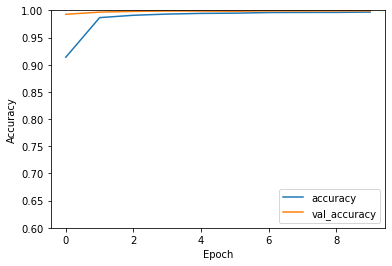

In [24]:
print("Plotting accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='lower right')
print("The model is being evaluated")
train_loss, train_acc = model.evaluate(X_train, cat, verbose=2)
print("The accuracy of the model is:")
print(train_acc)
print("The loss of the model is:")
print(train_loss)
#plt.savefig('eval.png')

Plotting accuracy versus epoch
The model is being evaluated
6722/6722 - 23s - loss: 0.0031 - accuracy: 0.9992 - 23s/epoch - 3ms/step
The accuracy of the model is:
0.9992375373840332
The loss of the model is:
0.0030751419253647327


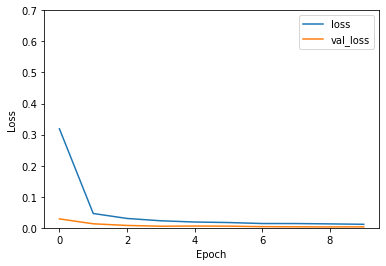

In [25]:
print("Plotting accuracy versus epoch")
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,0.7])
plt.legend(loc='upper right')
print("The model is being evaluated")
train_loss, train_acc = model.evaluate(X_train, cat, verbose=2)
print("The accuracy of the model is:")
print(train_acc)
print("The loss of the model is:")
print(train_loss)
#plt.savefig('loss.png')